# 5012 HW #2. Improve code Efficiency: Sort First!

## Scenario. 

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs. 

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.) 

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**TOTAL POINTS: 100**

---

In [9]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax

Answer Question #1 in the comments of the code chunk below. 

In [140]:
def computeAllTPRs(true_label, confs):
    '''

    inputs:
        - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
        - confs: list of confidences

    This method computes the True Positive Rate (TPRs) and FPRs for all relevant
    thresholds given true_label and confs. Relevant thresholds are considered
    all different values found in confs.
    '''

    # Define / initialize  variables
    sentinelValue = -1 # used to replace max value found thus far O(1)
    totalPositives = sum(true_label) #O(n)
    totalNegatives = len(true_label) - totalPositives  # O(1) len() is a constant time operation
    #print(true_label)
    truePositives = 0 #O(1)
    falsePositives = 0 #O(1)
    # Hint: Consider Memory Management
    truePositiveRate = []
    falsePositiveRate = []

    #Hint: Although not explicitly clear, the loop structure below is an 
        #embeded loop ie, O(n^2) ... do you see why??
    #Hint: If you sort the confidences first you can improve the iteration scheme.
        
    # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
    # append to truePositiveRate , falsePositiveRate lists. 
    for i in range(len(confs)): # O(n)
        maxVal = max(confs)  # Max Function takes O(n)
        argMax = argmax(confs) # argMax takes O(n)
        confs[argMax] = sentinelValue # Access a list at index n is O(1)
        #print(argMax)
        if true_label[argMax]==1: #O(1)
            truePositives += 1 # O(1)
        else:
            falsePositives += 1 #O(1)

        truePositiveRate.append(truePositives/totalPositives) # Appending to a list in python has a linear time complexity. O(1)
        falsePositiveRate.append(falsePositives/totalNegatives)  # Appending to a list in python has a linear time complexity. O(1)

    # Plot FPR vs TPR for all possible thresholds 
    # plt.plot(falsePositiveRate,truePositiveRate, label ='class' + str(i) + ' to all')
    # plt.legend()
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.show()


In the method computeAllTPRs, the first block of code is for instantiation of objects. Before, the for loop we can calculate the time complexity with the following information.
- sentinelValue = $O(1)$
- totalPositives = $O(n)$
- totalNegatives = $O(1)$
- truePositives = $O(1)$
- falsePositves = $O(1)$
- truePositiveRate = $O(1)$
- falsePositiveRate = $O(1)$

Thus until the for loop we get T(n) = n + 6
From the for loop we know that the for loop will be O(n). Since everything in the for loop is being done n times we can go line by line and factor in the for loop time complexity similar to a distribution rule.
- maxVal = $O(n)$ = $O(n^2)$
- argMax = $O(n)$ = $O(n^2)$
- confs[argMax] = $O(1)$ = $O(n)$
- if true_label[argMax]... = $O(1)$ = $O(n)$
- truePositives += 1 = $O(1)$ = $O(n)$
- else = $O(1)$ = $O(n)$
- falsePositives +=1 = $O(1)$ = $O(n)$
- truePositiveRate.append = $O(1)$ = $O(n)$
- falsePositiveRate.append = $O(1)$ = $O(n)$

In total for the for loop portion of the code we get that $T(n) = 2n^2 + 7n$

Together for the entire method we get that $T(n) = 2n^2 + 8n + 6$, which will give us $O(n^2)$

In [136]:
def testComputeAllTPRs(numSamples):
    confList = []
    labels = []
    maxVal = 10000
    #numSamples = 10000
    for i in range(0,numSamples):
        random.seed(i+1)
        n = random.randint(1,maxVal)
        confList.append(n/maxVal)
        if n/maxVal > .5: 
            lab = 1 
        else: 
            lab = 0
        labels.append(lab)
    computeAllTPRs(labels, deepcopy(confList))  # Why a deepcopy here?

Below, provide your implementation for Question #2.

In [134]:
def computeAllTPRs_improved(true_label, confs):
    '''

    inputs:
        - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
        - confs: list of confidences

    This method computes the True Positive Rate (TPRs) and FPRs for all relevant
    thresholds given true_label and confs. Relevant thresholds are considered
    all different values found in confs.
    '''

    # Define / initialize  variables
    sentinelValue = -1 # used to replace max value found thus far O(1)
    totalPositives = sum(true_label) #O(n)
    totalNegatives = len(true_label) - totalPositives  # O(1) len() is a constant time operation
    #print(true_label)
    truePositives = 0 #O(1)
    falsePositives = 0 #O(1)
    # Hint: Consider Memory Management
    truePositiveRate = []
    falsePositiveRate = []

    #Hint: Although not explicitly clear, the loop structure below is an 
        #embeded loop ie, O(n^2) ... do you see why??
    #Hint: If you sort the confidences first you can improve the iteration scheme.
        
    # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
    # append to truePositiveRate , falsePositiveRate lists. 
    for i in range(len(confs)):
        confs[i] = (confs[i],i)
    confs.sort(key=lambda x:x[0]) # O(n log n) python uses tim sort
    confs.reverse()
    for i in range(len(confs)): # O(n)
        maxVal,argMax = confs[i]  # O(1)
        #argMax = i # O(1)
        #confs[argMax] = sentinelValue # Access a list at index n is O(1)
        if true_label[argMax]==1: #O(1)
            truePositives += 1 # O(1)
        else:
            falsePositives += 1 #O(1)

        truePositiveRate.append(truePositives/totalPositives) # Appending to a list in python has a linear time complexity. O(1)
        falsePositiveRate.append(falsePositives/totalNegatives)  # Appending to a list in python has a linear time complexity. O(1)
    
    # Plot FPR vs TPR for all possible thresholds 
    # plt.plot(falsePositiveRate,truePositiveRate, label ='class' + str(i) + ' to all')
    # plt.legend()
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.show()
    falsePositiveRate,truePositiveRate


In the method computeAllTPRs, the first block of code is for instantiation of objects. Before, the for loop we can calculate the time complexity with the following information.
- sentinelValue = $O(1)$
- totalPositives = $O(n)$
- totalNegatives = $O(1)$
- truePositives = $O(1)$
- falsePositves = $O(1)$
- truePositiveRate = $O(1)$
- falsePositiveRate = $O(1)$

Thus until the for loop we get T(n) = n + 6

In our improved method we add another layer of for loops to mimic the enumrate the list so that we can keep a record of the original index values as the second element (1st index in the tuple)
The process is done for every element so the added time complexity is n.

Before we enter the forloop containing the logic for the confidences, we sort and reverse the list of confidences. The sort results in a n log n operation because python uses tim sort for the native sort function.
The reverse operator simply creates a reverse which is another n operation. 

From the for loop we know that the for loop will be O(n). Since everything in the for loop is being done n times we can go line by line and factor in the for loop time complexity similar to a distribution rule.
- maxVal,argMax = $O(1)$ = $O(n)$
- if true_label[argMax]... = $O(1)$ = $O(n)$
- truePositives += 1 = $O(1)$ = $O(n)$
- else = $O(1)$ = $O(n)$
- falsePositives +=1 = $O(1)$ = $O(n)$
- truePositiveRate.append = $O(1)$ = $O(n)$
- falsePositiveRate.append = $O(1)$ = $O(n)$

In total for the for loop portion of the code we get that $T(n) = 7n$

Together all of these operations will yield a $O(n log n)$ operation due to the most complex function of the sort function. 

Question #3. Below, provide your code which records and plots the runtime for the original and improved methods. 

In order to compare the two methods (original vs improved) we make a method to create the samples needed to run the functions. Since the improved function has a $O(n log n)$ it should be running faster as the number of $n$ increases. Showcased is the complexity graph (with the exclusion of plots iside the functions)

In [142]:
def createTestSamples(numSamples):
    confList = []
    labels = []
    maxVal = 10000
    for i in range(0,numSamples):
        random.seed(i+1)
        n = random.randint(1,maxVal)
        confList.append(n/maxVal)
        if n/maxVal > .5: 
            lab = 1 
        else: 
            lab = 0
        labels.append(lab)
    return [labels, deepcopy(confList)]

Text(0, 0.5, 'Runtime')

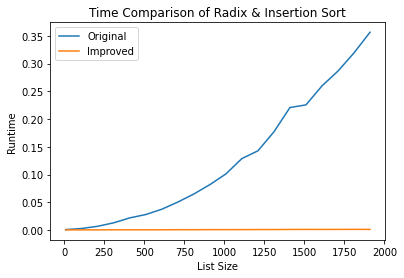

In [143]:
import time
original = []
improved = []
size = 2000
stepSize=100
startStep=10
## calculate the time required to sort various size lists
for i in range(startStep, size, stepSize):
    labels, conf = createTestSamples(i)
    labels1, conf1 = createTestSamples(i)
    ## do the original
    start = time.perf_counter()
    computeAllTPRs(labels, conf)
    original.append(time.perf_counter() - start)
    
    ## do the improved
    start = time.perf_counter()
    computeAllTPRs_improved(labels1, conf1)
    improved.append(time.perf_counter() - start)
    
## plot the results
plt.plot(range(startStep, size, stepSize), original, label = 'Original')
plt.plot(range(startStep, size, stepSize), improved, label = 'Improved')
#plt.plot(range(0, size, stepSize), defaultTime, label = 'Default')
plt.legend(frameon = 'none')
plt.title('Time Comparison of Radix & Insertion Sort')
plt.xlabel('List Size')
plt.ylabel('Runtime')